In [60]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

# Import and analyse the Data

In [61]:
df=pd.read_csv("TeleCust.csv")
df.head(20)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [62]:
#COVERT THE DATAFRAME IN TO ARRAY FOR PERFORMING SKLEARN MACHINELEARNING.

In [63]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [64]:
#creating x labels (input)

x=df[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]].values
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [65]:
#creating y label (output)

y=df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

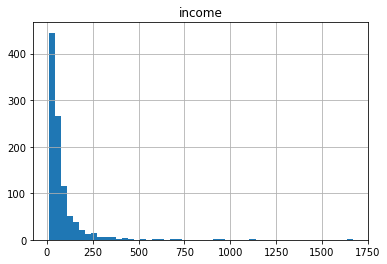

In [66]:
df.hist(column="income",bins=50)

# standardizing

In [67]:
x1=preprocessing.StandardScaler()
x2=x1.fit(x)
x3=x2.transform(x.astype(float))
x3[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#x3 is the standarized value of x you can use it in train test split instead of the calue of x (but Iam not using here)

# Making Train Test Set

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4) 

# Training

In [69]:
from sklearn.neighbors import KNeighborsClassifier

k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Testing

In [70]:
yhat=neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

# Accuracy Of The Model

In [85]:
#jacard score

#from sklearn.metrics import *
from sklearn import metrics

print("Train set accuracy: ",((metrics.accuracy_score(y_train,neigh.predict(x_train)))*100)) #output of train set and the predicted output
print("Test set accuracy: ",(metrics.accuracy_score(y_test,yhat)*100))  #output of the test set and the predicted value of test set

#classifier report: It is also called as the f1 score
print("Classifier report is:",metrics.classification_report(y_test,yhat))

#cunfusion metrics
print("Confusion metrics is: ",metrics.confusion_matrix(y_test,yhat))

Train set accuracy:  51.24999999999999
Test set accuracy:  32.0
Classifier report is:               precision    recall  f1-score   support

           1       0.31      0.45      0.37        51
           2       0.33      0.36      0.35        44
           3       0.33      0.30      0.31        54
           4       0.31      0.18      0.23        51

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.31       200
weighted avg       0.32      0.32      0.31       200

Confusion metrics is:  [[23  9 13  6]
 [ 9 16  9 10]
 [22 12 16  4]
 [20 11 11  9]]


# Finding The Best Value Of K

In [72]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))

for n in range(1,ks):
    neigh1=KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    pred1=neigh1.predict(x_test)
    
    mean_acc[n-1]=metrics.accuracy_score(pred1,y_test) #jarcard score #n-1
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(pred1.shape[0])  #n-1
    
print("The best accuracy is ",mean_acc.max()," for k value ",mean_acc.argmax()+1)

The best accuracy is  0.34  for k value  9


# Prediction

Input(
"region"(1-3)
"tenure"(any number)
"age"(any number)
"marital"(1 or 0)
"address"(any)
"income"(float)
"ed"(1-5)
"employ"(any number)
"retire"(0.0)
"gender"(1 or 0)
"reside"(1 to 6))

In [78]:
#new input
new=np.array([[1,23,21,0,21,29.0,3,11,0.0,1,3]])
print(new)

k=7
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

#predicting

h=neigh.predict(n1)
print ("class of the pacakage is",h[0])


[[ 1. 23. 21.  0. 21. 29.  3. 11.  0.  1.  3.]]
class of the pacakage is 4
